In [ ]:
#在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，
#以Titanic_train.csv 中，首先將有遺失值的數值刪除，
#我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。

#Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。
#Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。
#Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


#顯示所有行
pd.set_option('display.max_columns', None)
#顯示所有列
pd.set_option('display.max_rows', None)
#顯示行設定
pd.set_option('max_colwidth',100)

import pingouin as pg
import researchpy  

0.23.2


In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
## 取出資料後，把遺失值刪除
complete_data=df_train[['PassengerId','Survived','Pclass','Name',"Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]].dropna()
display(complete_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C


In [7]:
complete_data['Survived_cate']=complete_data['Survived']
complete_data['Survived_cate']=complete_data['Survived_cate'].astype('object')
print(complete_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    183 non-null    int64  
 1   Survived       183 non-null    int64  
 2   Pclass         183 non-null    int64  
 3   Name           183 non-null    object 
 4   Sex            183 non-null    object 
 5   Age            183 non-null    float64
 6   SibSp          183 non-null    int64  
 7   Parch          183 non-null    int64  
 8   Ticket         183 non-null    object 
 9   Fare           183 non-null    float64
 10  Cabin          183 non-null    object 
 11  Embarked       183 non-null    object 
 12  Survived_cate  183 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 20.0+ KB
None


In [12]:
# 運用 apply function  做變數轉換
complete_data['Age_above65']=complete_data['Age'].apply((lambda x: "Y" if x >=65 else "N"))
print(complete_data.info())
display(complete_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    183 non-null    int64  
 1   Survived       183 non-null    int64  
 2   Pclass         183 non-null    int64  
 3   Name           183 non-null    object 
 4   Sex            183 non-null    object 
 5   Age            183 non-null    float64
 6   SibSp          183 non-null    int64  
 7   Parch          183 non-null    int64  
 8   Ticket         183 non-null    object 
 9   Fare           183 non-null    float64
 10  Cabin          183 non-null    object 
 11  Embarked       183 non-null    object 
 12  Survived_cate  183 non-null    object 
 13  Age_above65    183 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 21.4+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate,Age_above65
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,N
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,N
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,N
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,N


In [24]:
## 寫一個副程式判斷相關性的強度
complete_data['Age_above65_female']=complete_data['Age_above65']

complete_data['Age_above65_female']=complete_data['Age_above65_female'].apply(lambda x: 1 if x =="Y" else 0)
complete_data['Sex01']=complete_data['Sex']
complete_data['Sex01']=complete_data['Sex01'].apply(lambda x: 1 if x =="female" else 0)



In [25]:
complete_data['Age_above65_female_01']=complete_data['Age_above65_female']+complete_data['Sex01']

In [26]:
complete_data['Age_above65_female']=complete_data['Age_above65_female_01'].apply(lambda x: "N" if x ==0 else "Y")

In [28]:
display(complete_data.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate,Age_above65,Age_above65_female,Sex01,Age_above65_female_01
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,N,Y,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,N,Y,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,N,N,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,N,Y,1,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,N,Y,1,1


In [ ]:
#Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

In [29]:
#Survived_cate, Age_above65_female, Age_above65 均為離散

In [34]:
complete_data['Survived_cate']=complete_data['Survived_cate'].astype('object')

In [37]:
complete_data['Survived_cate']=complete_data['Survived_cate'].apply(lambda x: 'Y' if x ==1 else "N")

In [39]:
complete_data[['Age_above65_female','Survived_cate']].groupby('Survived_cate').count()

,Age_above65_female
Survived_cate,
N,60
Y,123


In [41]:
complete_data[['Age_above65','Survived_cate']].groupby('Survived_cate').count()

,Age_above65
Survived_cate,
N,60
Y,123


In [42]:
#採用 Cramér's V

In [45]:
contTable1 = pd.crosstab(complete_data['Age_above65'], complete_data['Survived_cate'])
contTable2 = pd.crosstab(complete_data['Age_above65_female'], complete_data['Survived_cate'])
contTable1
contTable2

Survived_cate,N,Y
Age_above65_female,,
N,50,40
Y,10,83


In [46]:
df1 = min(contTable1.shape[0], contTable1.shape[1]) - 1
df1

1

In [47]:
crosstab, res = researchpy.crosstab(complete_data['Survived_cate'], complete_data['Age_above65'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.1686


In [50]:
def judgment_CramerV(df,V):
    if df1 == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df1,res.loc[2,'results'])

'small'

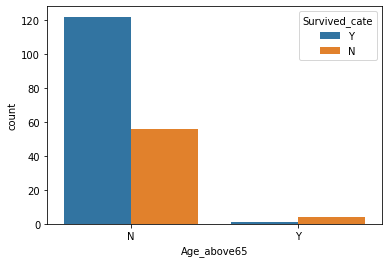

In [51]:
g= sns.countplot(x="Age_above65", hue="Survived_cate", data=complete_data)

In [ ]:
df2 = min(contTable1.shape[0], contTable1.shape[1]) - 1
crosstab, res = researchpy.crosstab(complete_data['Survived_cate'], complete_data['Age_above65_female'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

def judgment_CramerV(df,V):
    if df2 == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df1,res.loc[2,'results'])